In [144]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

https://fivethirtyeight.com/features/how-good-are-you-at-guess-who/

### Riddler Express

```
  1   2    4
  8  16   32
 64 128  256
```

In [103]:
def m(b, row):
    return (b & row)==row

def is_win(b):
    return (m(b,  7) or m(b, 56) or m(b, 448) or
            m(b, 73) or m(b, 146) or m(b, 292) or
            m(b, 273) or m(b, 84))

In [104]:
wins = 0
for b in range(512):
    wins += is_win(b) and not is_win(b ^ 511)
wins / 512

0.38671875

### Riddler Classic

In [162]:
def guess_who(a, b, _memo={}):
    '''play guess who, when you have `a` options
    and opponent has `b` options'''
    if (a, b) not in _memo:
        options = [1/a]
        for k in range(1, a//2+1):
            options.append(k/a     * (1 - guess_who(b, k)) +
                           (a-k)/a * (1 - guess_who(b, a-k)))
        _memo[a, b] = max(options)
    return _memo[a, b]

In [163]:
guess_who(4, 4)

0.5625

In [164]:
guess_who(14, 14)

0.5612244897959184

In [60]:
guess_who(24, 24)

0.5555555555555556

In [44]:
for i in range(1, 200):
    print(f'{i:5} {guess_who(i, i)}')


    1 1.0
    2 0.5
    3 0.5555555555555556
    4 0.5625
    5 0.56
    6 0.5555555555555556
    7 0.5510204081632654
    8 0.5625
    9 0.5555555555555556
   10 0.56
   11 0.5619834710743802
   12 0.5555555555555556
   13 0.5562130177514792
   14 0.5612244897959184
   15 0.5555555555555556
   16 0.5625
   17 0.5570934256055364
   18 0.5617283950617284
   19 0.5595567867036011
   20 0.56
   21 0.562358276643991
   22 0.5619834710743802
   23 0.5595463137996219
   24 0.5555555555555556
   25 0.5568000000000001
   26 0.5591715976331361
   27 0.5582990397805213
   28 0.5612244897959183
   29 0.558858501783591
   30 0.5622222222222222
   31 0.5587929240374611
   32 0.5625
   33 0.559228650137741
   34 0.5622837370242215
   35 0.56
   36 0.5617283950617284
   37 0.5602629656683711
   38 0.5609418282548477
   39 0.5601577909270218
   40 0.56
   41 0.561570493753718
   42 0.562358276643991
   43 0.5624661979448351
   44 0.5619834710743802
   45 0.5609876543209877
   46 0.5595463137996219
   

In [17]:
import numpy as np

In [33]:
results = np.zeros((5, 5))

In [34]:
for a in range(1, 6):
    for b in range(1, 6):
        results[a-1, b-1] = guess_who(a, b)

In [32]:
results


array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.5       , 0.5       , 0.66666667, 0.75      , 0.8       ],
       [0.33333333, 0.5       , 0.55555556, 0.58333333, 0.66666667],
       [0.25      , 0.5       , 0.5       , 0.5625    , 0.6       ],
       [0.2       , 0.4       , 0.46666667, 0.5       , 0.56      ]])

In [125]:
guess_who(500, 500)

0.5624640000000001

In [106]:
guess_who(200, 100)

0.4423999999999999

In [126]:
len(guess_who.__defaults__[0])

398008

In [167]:
mx = 100
X, Y = np.meshgrid(range(1, mx+1), range(1, mx+1))
Z = np.zeros((mx, mx))
for i in range(mx):
    for j in range(mx):
        Z[i, j] = guess_who(i+1, j+1)

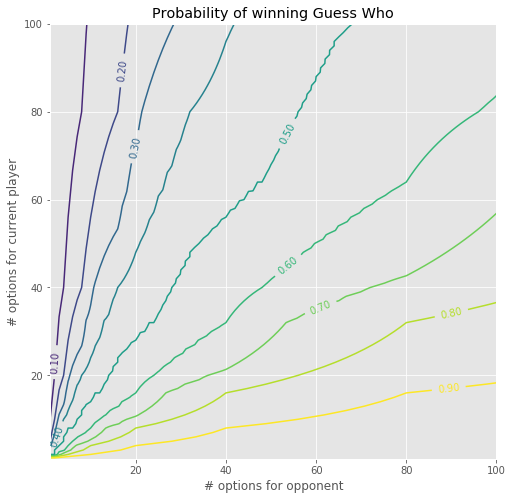

In [168]:
fig, ax = plt.subplots(figsize=(8, 8))
cs = ax.contour(X, Y, Z, levels=np.arange(0, 1, 0.1))
ax.clabel(cs, fmt='%1.2f')
ax.set_title('Probability of winning Guess Who')
ax.set_ylabel('# options for current player')
ax.set_xlabel('# options for opponent');
plt.savefig("guess_who.png")

In [159]:
guess_who(4, 4)

0.5625

In [160]:
guess_who(24, 24)

0.5555555555555556

In [161]:
guess_who(14, 14)

0.5612244897959184